In [ ]:
import matplotlib.pyplot as plt
import skimage.io as imgio
import skimage.color as imgcolor
import numpy as np

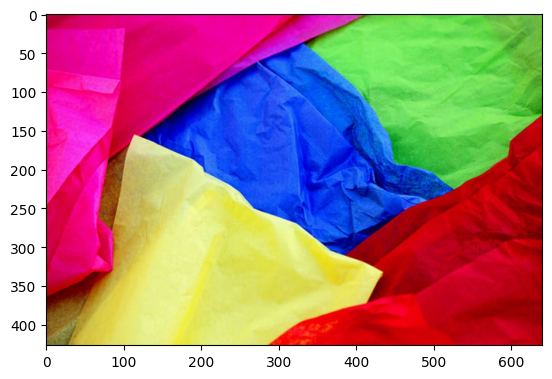

In [ ]:
img = imgio.imread("img_rgb_1.jpg")
plt.imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(427, 640, 3)

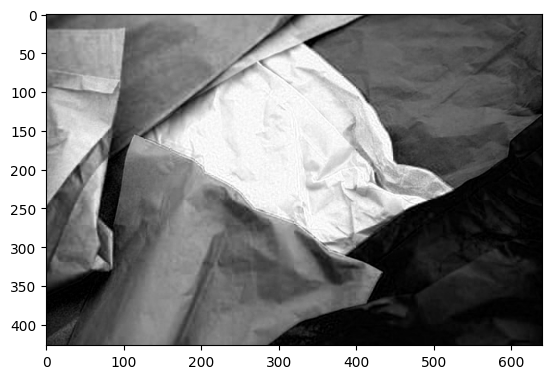

In [ ]:
#convirtiendo la imagen a escala de gris
plt.imshow(img[:,:,2],cmap="gray")

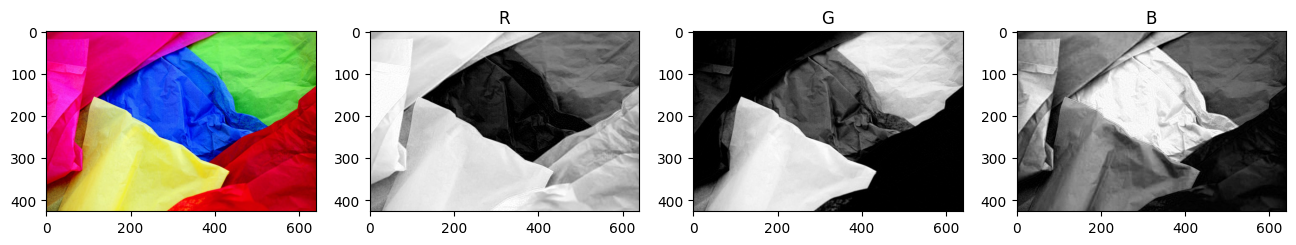

In [ ]:
#visualizando la imagen por canal partiendo de la imagen original. 
plt.figure(figsize=(16,10))
nombre_canal = ["R","G","B"]
plt.subplot(1,4,1)
plt.imshow(img)
for i in range(3):
  canal = img[:,:,i]
  plt.subplot(1,4,i+2)
  plt.imshow(canal,cmap = "gray")
  plt.title(nombre_canal[i])

In [ ]:
img[220:230,310:320,2]

array([[245, 243, 253, 249, 246, 241, 243, 250, 251, 249],
       [239, 241, 250, 246, 244, 242, 245, 250, 251, 250],
       [236, 241, 246, 244, 244, 244, 246, 250, 250, 251],
       [235, 242, 247, 247, 248, 246, 246, 247, 245, 245],
       [246, 240, 246, 251, 243, 242, 255, 254, 243, 246],
       [242, 242, 240, 249, 252, 250, 249, 240, 244, 255],
       [243, 248, 245, 243, 246, 248, 248, 245, 247, 251],
       [243, 251, 251, 240, 240, 243, 245, 252, 253, 243],
       [243, 249, 246, 247, 251, 247, 239, 249, 255, 248],
       [246, 247, 247, 250, 255, 250, 241, 248, 254, 248]], dtype=uint8)

(427, 640)


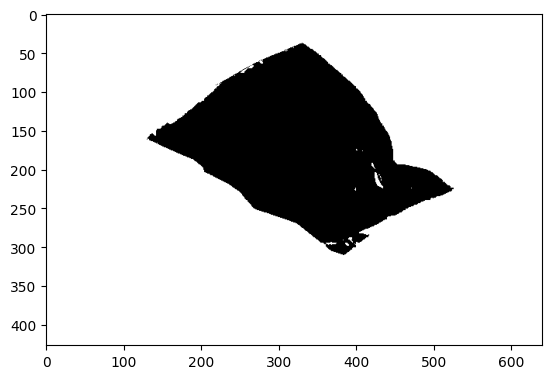

In [ ]:
filtro = (img[:,:,2]>120) & (img[:,:,0]<100)
print(filtro.shape)
plt.imshow( filtro, cmap="binary")

In [ ]:
filtro

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

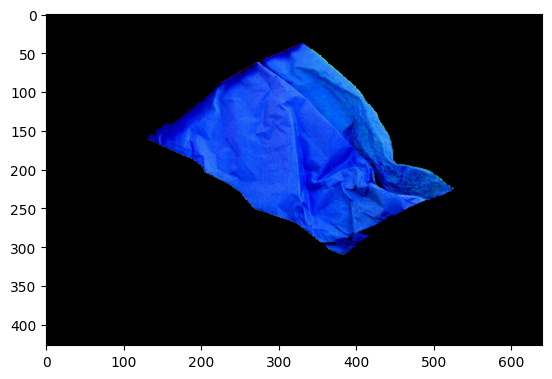

In [ ]:
plt.imshow(np.stack([filtro,filtro,filtro],axis=2) * img)

In [ ]:
fotom = np.stack([filtro,filtro,filtro],axis=2) * img

In [ ]:
fotom[220:230,320:330,:]

array([[[ 31,  97, 243],
        [ 33, 100, 253],
        [ 31,  97, 255],
        [ 21,  87, 243],
        [ 24,  91, 234],
        [ 43, 109, 247],
        [ 48, 110, 255],
        [ 33,  87, 255],
        [  0,  43, 234],
        [  0,  35, 241]],

       [[ 34, 100, 246],
        [ 33,  98, 252],
        [ 32,  96, 255],
        [ 22,  87, 243],
        [ 19,  86, 229],
        [ 41, 107, 243],
        [ 51, 113, 255],
        [ 36,  91, 255],
        [  0,  42, 233],
        [  0,  34, 239]],

       [[ 32,  99, 242],
        [ 29,  94, 248],
        [ 33,  97, 255],
        [ 26,  91, 247],
        [ 19,  86, 229],
        [ 42, 108, 244],
        [ 55, 117, 255],
        [ 36,  91, 255],
        [  0,  43, 234],
        [  0,  34, 239]],

       [[ 23,  90, 233],
        [ 21,  86, 240],
        [ 32,  96, 255],
        [ 30,  95, 251],
        [ 22,  89, 232],
        [ 47, 113, 249],
        [ 62, 124, 255],
        [ 40,  95, 255],
        [  0,  46, 234],
        [  0,  36, 

ESCALA DE GRIS

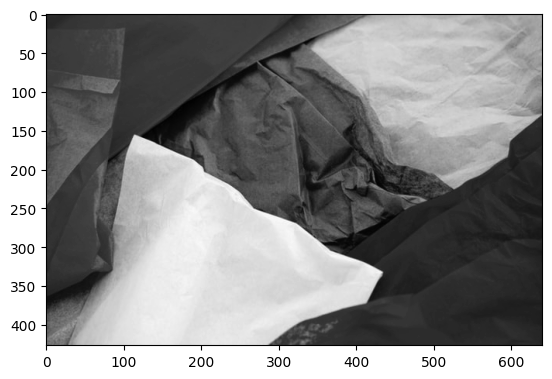

In [ ]:
imgg = 0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]
plt.imshow(imgg,cmap="gray")

ESCALAMIENTO DE IMAGEN

In [ ]:
import skimage.transform as imgt

In [ ]:
!wget lalussoft.com/mldemos/img_rgb_3.jpg

--2023-05-22 14:20:09--  http://lalussoft.com/mldemos/img_rgb_3.jpg
Resolving lalussoft.com (lalussoft.com)... 51.222.100.231
Connecting to lalussoft.com (lalussoft.com)|51.222.100.231|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/img_rgb_3.jpg [following]
--2023-05-22 14:20:09--  https://lalussoft.com/mldemos/img_rgb_3.jpg
Connecting to lalussoft.com (lalussoft.com)|51.222.100.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51070 (50K) [image/jpeg]
Saving to: ‘img_rgb_3.jpg’

img_rgb_3.jpg       100%[===================>]  49.87K  --.-KB/s    in 0.03s   

2023-05-22 14:20:09 (1.57 MB/s) - ‘img_rgb_3.jpg’ saved [51070/51070]



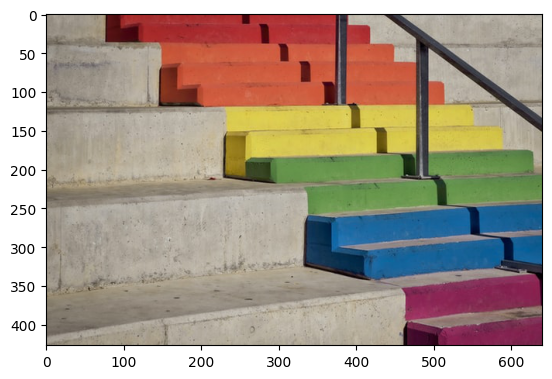

In [ ]:
img = imgio.imread("img_rgb_3.jpg")
plt.imshow(img)

In [ ]:
i = imgt.rescale(img,0.1,multichannel = True)

<ipython-input-28-d1df00461ab5>:1: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  i = imgt.rescale(img,0.1,multichannel = True)


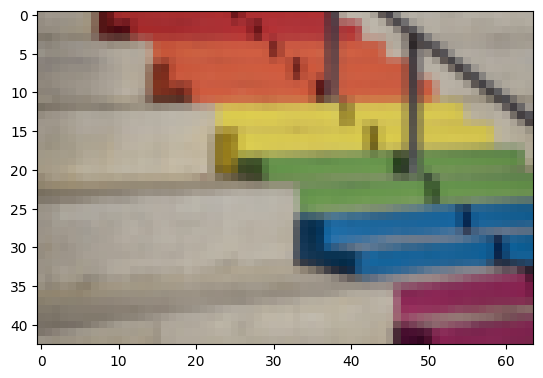

In [ ]:
plt.imshow(i)

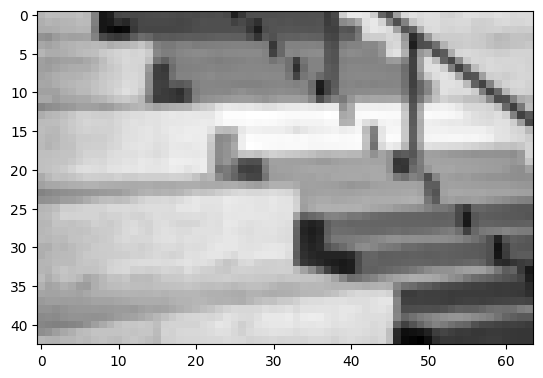

In [ ]:
#Convirtiendo a escala de gris la imagen difuminada
imgg = imgcolor.rgb2gray(img)
i = imgt.rescale(imgg,0.1)
plt.imshow(i,cmap="gray")

FILTRO Y CONVOLUCIÓN

In [ ]:
def filtrar(segmento_img,filtro):
  r = sum(sum(segmento_img * filtro))
  return min(max(r,0),255)

In [ ]:
#asume filtro es de dim 3*3
def convolucion(imagen,filtro):
  r = np.zeros(imagen.shape)
  f,c = imagen.shape
  for i in range(f-2):
    for j in range(c-2):
      r[i,j] = filtrar(imagen[i:i+3,j:j+3],filtro)
  return r.astype(np.uint8)


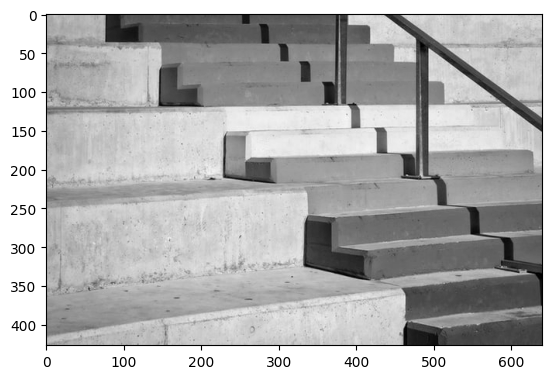

In [ ]:
#visualizando la imagen en escala de gris por intermedio de la librería skimage
imgg = (imgcolor.rgb2gray(img)*255).astype(np.uint8)
plt.imshow(imgg,cmap="gray")

In [ ]:
#creación del filtro horizontal
fh = np.array([
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


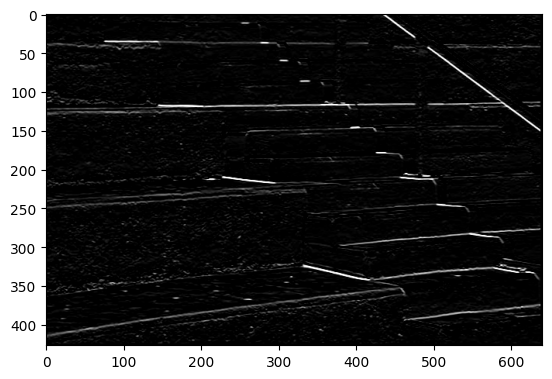

In [ ]:
print(fh)
resultadoh = convolucion(imgg,fh)
plt.imshow(resultadoh,cmap="gray")

In [ ]:
#Creación del filtro vertical 
fv = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


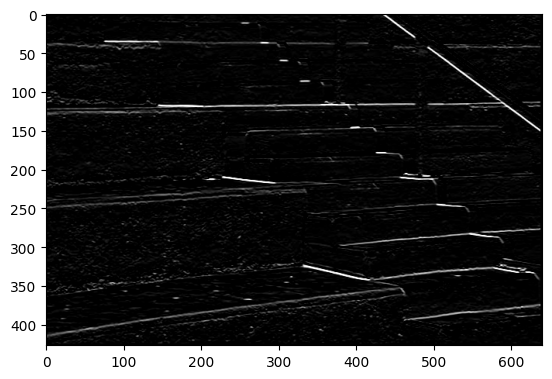

In [ ]:
print(fh)
resultadov = convolucion(imgg,fv)
plt.imshow(resultadoh,cmap="gray")

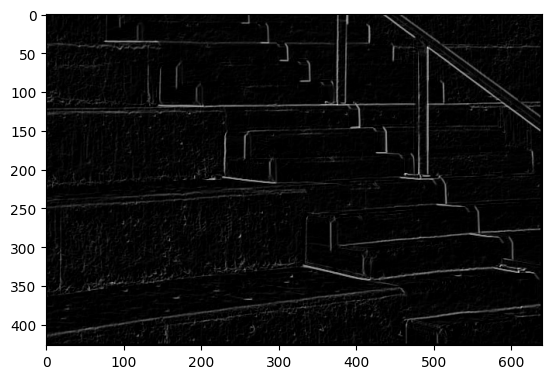

In [ ]:
#visualizando los ejes verticales y horizontales
plt.imshow((resultadoh*0.5+resultadov*0.5).astype(np.uint8),
           cmap="gray")

EJERCICIO EN CLASE

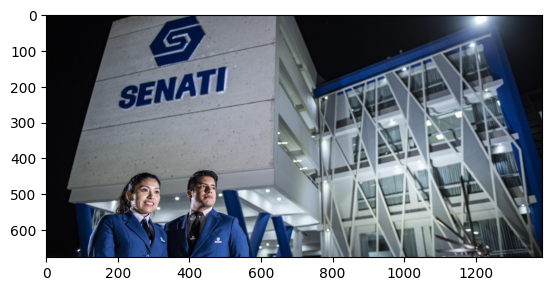

In [ ]:
imgs = imgio.imread("senati.jpg")
plt.imshow(imgs)

In [ ]:
def filtrar(segmento_img,filtro):
  r = sum(sum(segmento_img * filtro))
  return min(max(r,0),255)

In [ ]:
#asume filtro es de dim 3*3
def convolucion1(imagen,filtro):
  r = np.zeros(imagen.shape)
  f,c = imagen.shape
  for i in range(f-2):
    for j in range(c-2):
      r[i,j] = filtrar(imagen[i:i+3,j:j+3],filtro)
  return r.astype(np.uint8)

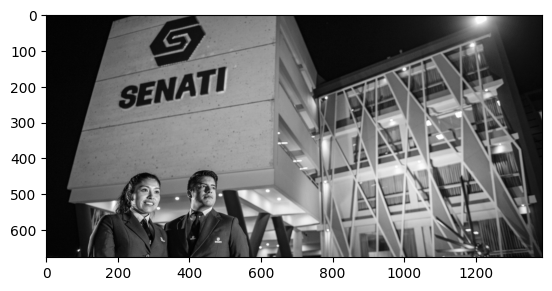

In [ ]:
#visualizando la imagen en escala de gris por intermedio de la librería skimage
imgg = (imgcolor.rgb2gray(imgs)*255).astype(np.uint8)
plt.imshow(imgg,cmap="gray")

In [ ]:
#creación del filtro horizontal
fh = np.array([
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


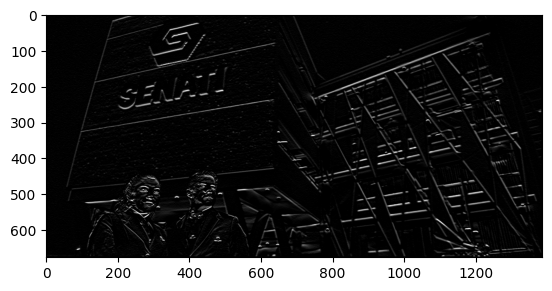

In [ ]:
print(fh)
resultadoh = convolucion1(imgg,fh)
plt.imshow(resultadoh,cmap="gray")

In [ ]:
#Creación del filtro vertical 
fv = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


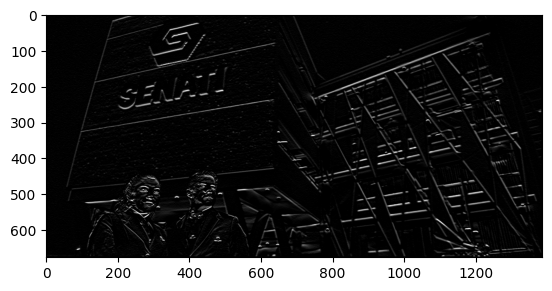

In [ ]:
print(fh)
resultadov = convolucion1(imgg,fv)
plt.imshow(resultadoh,cmap="gray")

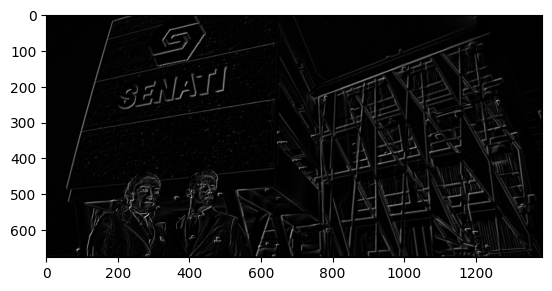

In [ ]:
#visualizando los ejes verticales y horizontales
plt.imshow((resultadoh*0.5+resultadov*0.5).astype(np.uint8),
           cmap="gray")